In [45]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#dataset load
df = pd.read_csv("/zomato.csv")
#starting five rows
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [46]:
#check duplicates
print("Duplicates before removal:",df.duplicated().sum())

Duplicates before removal: 0


In [47]:
df=df.drop_duplicates()
print("Duplicates before removal:",df.duplicated().sum())

Duplicates before removal: 0


In [48]:
#Handling missing values-check nulls
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
restaurant name,0
restaurant type,0
rate (out of 5),68
num of ratings,0
avg cost (two people),57
online_order,0
table booking,0
cuisines type,0


In [49]:
#drop null rows
print("Rows before:", len(df))
df = df.dropna()
print("Rows after:", len(df))
# or  df['rating'].fillna(df['rating'].mean(),inplace=True)

Rows before: 7105
Rows after: 6984


In [50]:
df.rename(columns={'avg cost (two people)': 'cost_for_two'},inplace=True)

/tmp/ipython-input-50-4143531944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'avg cost (two people)': 'cost_for_two'},inplace=True)


In [51]:
#clean currency symbol-remove rs ans commas, convert to integer
df['cost_for_two']=df['cost_for_two'].replace('₹,]','',regex=True).astype(float)



/tmp/ipython-input-51-36666703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_for_two']=df['cost_for_two'].replace('₹,]','',regex=True).astype(float)


In [52]:
#convert rating column
df.rename(columns={'rate (out of 5)': 'rating'},inplace=True)
df['rating']=df['rating'].astype(float)

/tmp/ipython-input-52-714629334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'rate (out of 5)': 'rating'},inplace=True)
/tmp/ipython-input-52-714629334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating']=df['rating'].astype(float)


In [53]:
#convert online order and table_booking to boolean
df['online_order']=df['online_order'].map({'Yes':True, 'No': False})
df['table booking']=df['table booking'].map({'Yes':True, 'No': False})

/tmp/ipython-input-53-2170583921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['online_order']=df['online_order'].map({'Yes':True, 'No': False})
/tmp/ipython-input-53-2170583921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['table booking']=df['table booking'].map({'Yes':True, 'No': False})


/tmp/ipython-input-54-2482669851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index,x=top_cuisines.values, palette="mako")


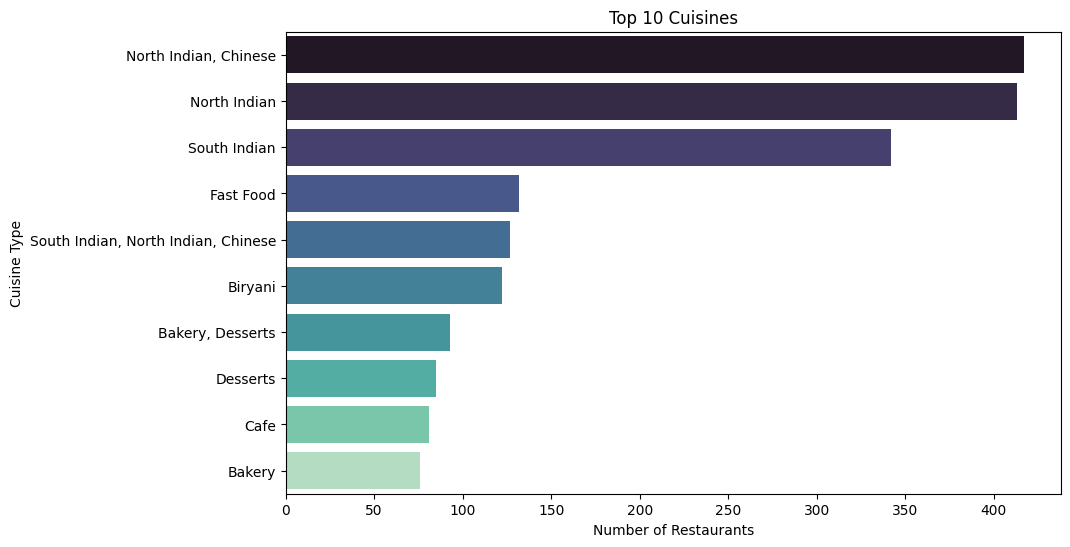

In [54]:
#EDA-1. top 10 cuisines
import seaborn as sns

top_cuisines=df['cuisines type'].value_counts().head(10)

#plot
plt.figure(figsize=(10,6))
sns.barplot(y=top_cuisines.index,x=top_cuisines.values, palette="mako")
plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()

/tmp/ipython-input-55-3975678173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_restaurants.index,x=top_restaurants.values, palette="rocket")


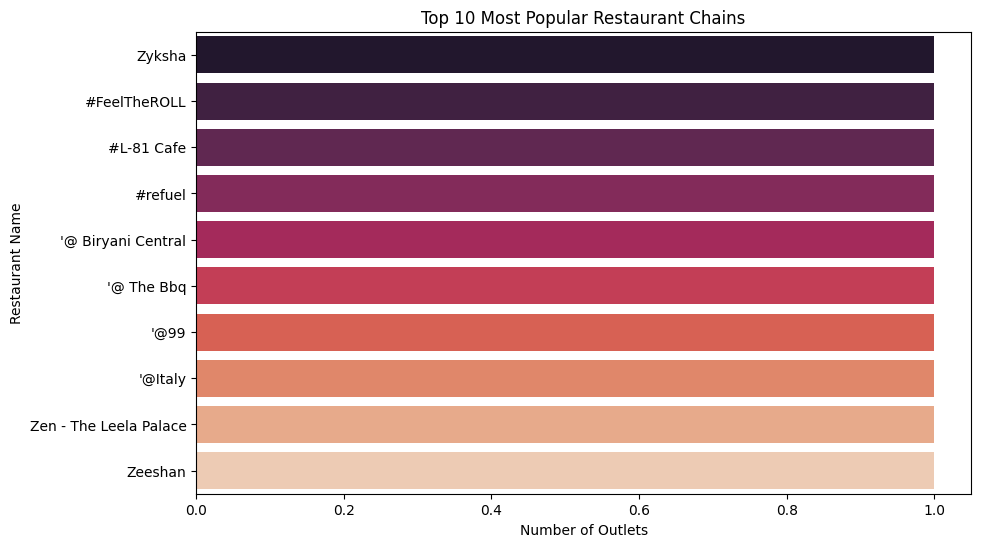

In [55]:
#most popular restaurant chains

top_restaurants=df['restaurant name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_restaurants.index,x=top_restaurants.values, palette="rocket")
plt.title("Top 10 Most Popular Restaurant Chains")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Name")
plt.show()

In [56]:
df[['online_order', 'rating']].isnull().sum()


,0
online_order,0
rating,0


In [57]:
df_boxplot=df[['online_order', 'rating']].dropna()

In [58]:
df_boxplot.dtypes

,0
online_order,bool
rating,float64


In [59]:
# If online_order is not boolean or 'Yes'/'No', ensure it's correct
df_boxplot['online_order'] = df_boxplot['online_order'].astype(str)

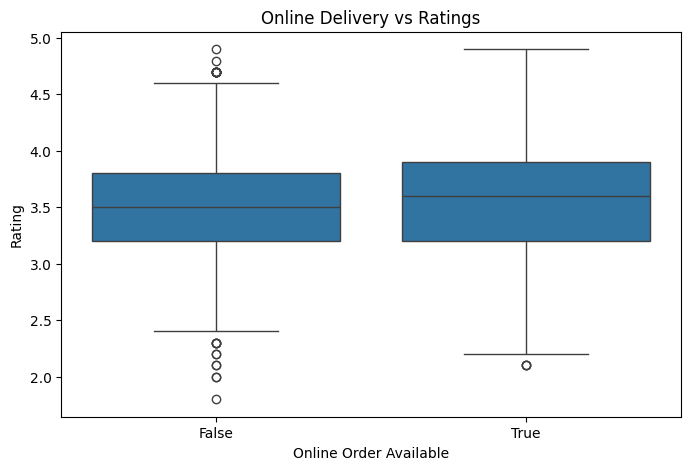

In [60]:
#online delivery vs Ratings
plt.figure(figsize=(8,5))
sns.boxplot(x='online_order',y='rating',data=df_boxplot)
plt.title("Online Delivery vs Ratings")
plt.xlabel("Online Order Available")
plt.ylabel("Rating")
plt.show()

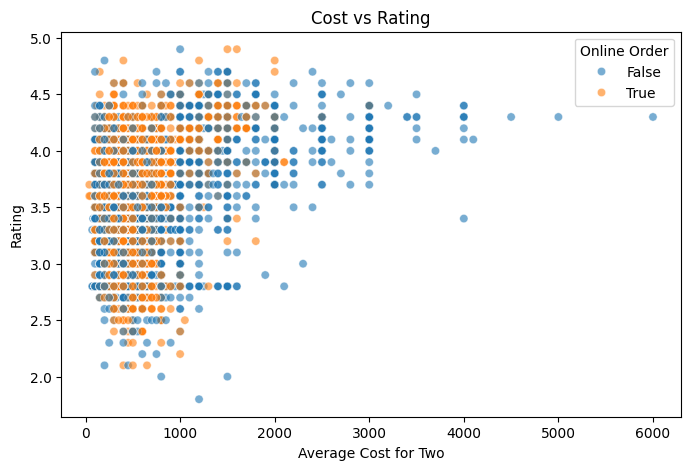

In [61]:
#Price vs Rating Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='cost_for_two', y='rating', data=df, hue='online_order', alpha=0.6)
plt.title("Cost vs Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.legend(title="Online Order")
plt.show()

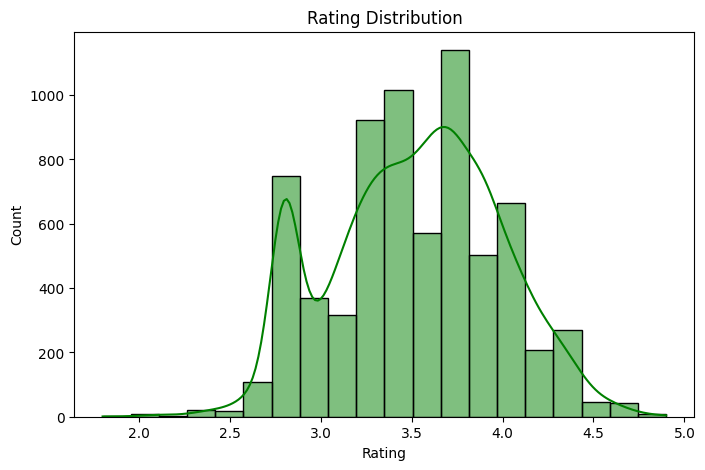

In [62]:
#Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color='green')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-63-2518410454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


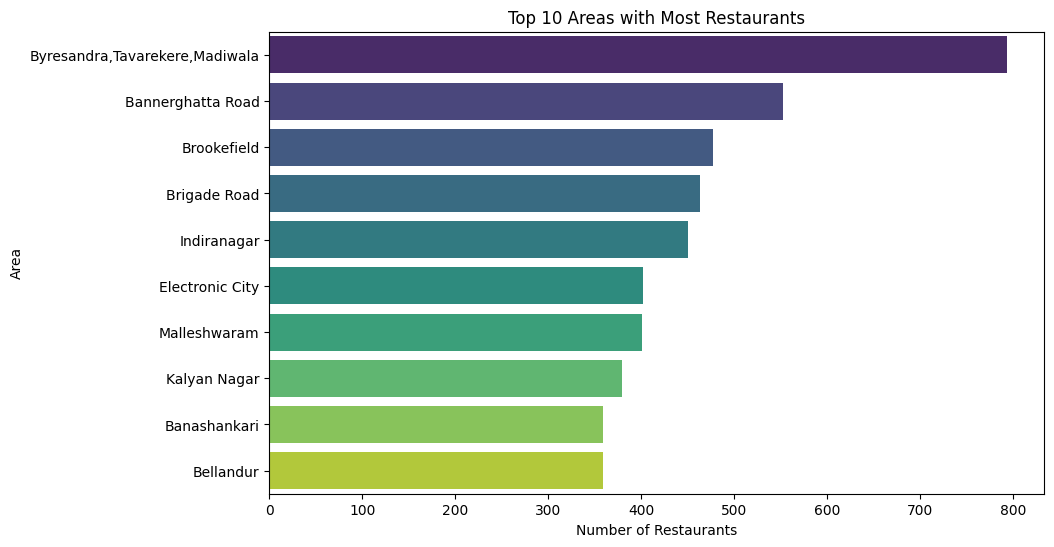

In [63]:
#city wise restaurant count
top_areas = df['area'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title("Top 10 Areas with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Area")
plt.show()

In [64]:
df.groupby('cuisines type')['rating'].mean().sort_values(ascending=False).head(10)

,rating
cuisines type,
"Continental, North Indian, Italian, South Indian, Finger Food",4.9
"Asian, Chinese, Thai, Momos",4.9
"Healthy Food, Salad, Mediterranean",4.9
"Asian, Mediterranean, North Indian, BBQ",4.7
"Chinese, American, Continental, Italian, North Indian",4.7
"Italian, American, Pizza",4.7
"Asian, Burmese",4.7
"Continental, European, BBQ, Chinese, Asian",4.7
"BBQ, North Indian, Continental, Chinese",4.7


### 🔍 Key Insights
- North Indian and Chinese cuisines dominate the menu.
- Online ordering is associated with better ratings.
- Affordable restaurants (~₹300–600) are the most common.
- Koramangala is the most saturated restaurant area in the city.


In [65]:
#export clean data
df.to_csv('cleaned_zomato.csv', index=False)

In [66]:
#download from colab
from google.colab import files
files.download('cleaned_zomato.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>